In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

The double_gaussian is
$$p(M, d_L) = p(M|d_L)p(d_L) = \mathrm{evolving\_gaussian}(M, d_L)*\mathrm{gaussian}(d_L)$$

The realistic model is
$$p(M, d_L) = p(M)p(d_L) = \mathrm{PLpeak}(M)*\mathrm{DLsq}(d_L)$$

In [6]:
# Mass distributions
def mean(DL, dMdDL = 30./1000., offset = 5.):
    return DL*dMdDL + offset

def std(DL, dMdDL = 8./1000., offset = 1.):
    return DL*dMdDL + offset

def PLpeak(m, alpha = -2., mmin = 5., mmax = 70., mu = 30., sigma = 4., w = 0.2):
    norm_pl = (1-alpha)/(mmin**(alpha+1) - mmax**(alpha+1))
    pl      = norm_pl * m**alpha
    peak    = np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    return w*pl + (1-w)*peak

def evolving_gaussian(m, DL):
    mu = mean(DL)
    sigma = std(DL)
    return np.exp(-0.5*((m-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

# DL distributions
def DLsq(DL, DLmax = 5000):
    return 3*DL**2/DLmax**3

def gaussian(DL, mu = 1600, sigma = 400):
    return np.exp(-0.5*((DL-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)

In [42]:
from astropy import units
from bilby.gw.cosmology import z_at_value
from astropy.cosmology import FlatLambdaCDM

def luminosity_distance_to_redshift(distance, H0s):
    return np.array([z_at_value(FlatLambdaCDM(H0=H0, Om0=0.3075).luminosity_distance, distance * units.Mpc) for H0 in H0s])


In [70]:
m = np.linspace(10,200,1000).reshape(-1,1)
dL = np.linspace(10,5000,100)

H0 = np.linspace(50,100,50)
z = luminosity_distance_to_redshift(dL, H0)

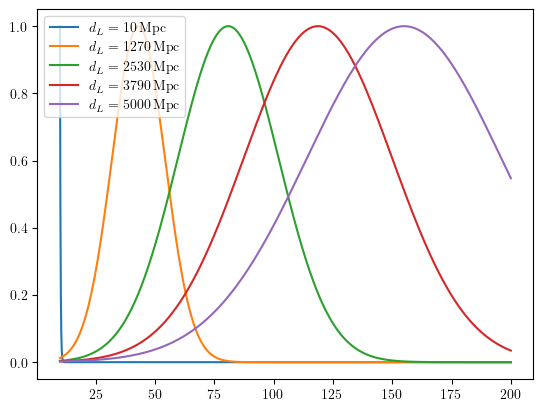

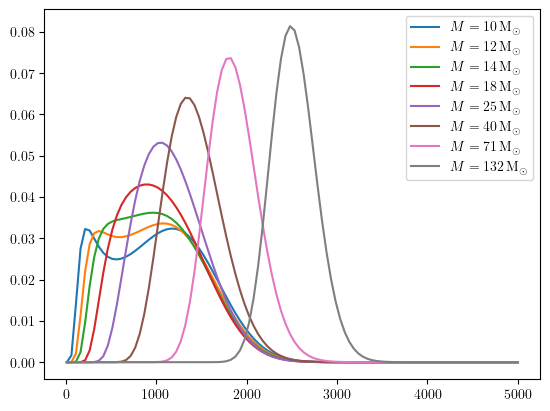

In [78]:
for i in [0,25,50,75,99]:
    prop = np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[:,i]
    y = prop/np.max(prop)
    plt.plot(m, y, label = "$d_L = "+str(f'{dL[i]:.0f}')+"\,\mathrm{Mpc}$")
plt.legend()
plt.show()

for i in [0,10,20,40,80,160,320,640]:
    prop = np.einsum("ij, j -> ij", evolving_gaussian(m, dL), gaussian(dL))[i,:]
    y = prop/np.sum(prop)
    plt.plot(dL, y, label = "$M = "+str(f'{m[i,0]:.0f}')+"\,\mathrm{M}_\odot$")
plt.legend()
plt.show()

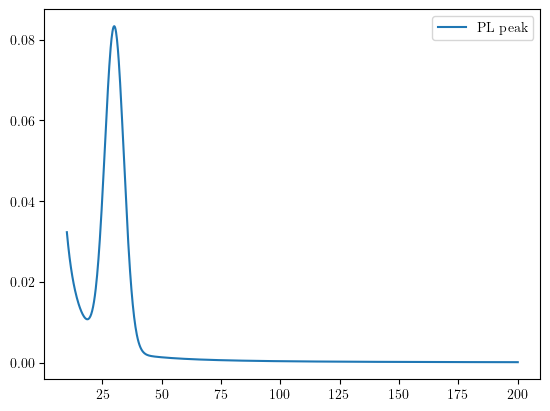

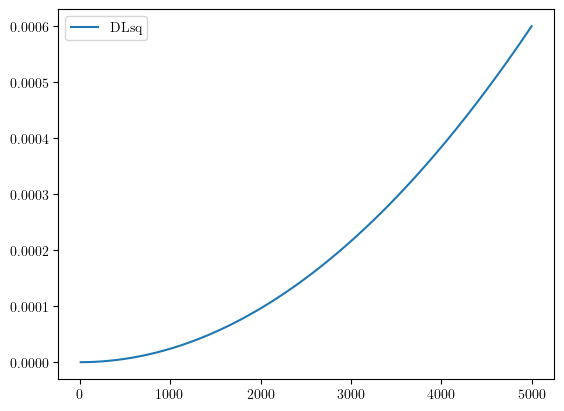

In [72]:
plt.plot(m, PLpeak(m), label = "PL peak")
plt.legend()
plt.show()
plt.plot(dL, DLsq(dL), label = "DLsq")
plt.legend()
plt.show()